# **MOUNT GOOGLE DRIVE**
In Google Colab, we can mount Google Drive, allowing access to files located under /content/drive/MyDrive/.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **IMPORT PACKAGES**
Here we import all the packages that are necessary to compute.

In [ ]:
import pandas as pd
import numpy as np
!pip install sentence-transformers
from sentence_transformers import SentenceTransformer
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import pickle

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 38.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 30.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 34.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 75.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

# **IMPORT DATASET**
Here we import dataset from Google Drive

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/DBDA Project/movies.csv")

# **DATA VISUALIZATION**
Below shown is the visualization of imported dataset.It basically has 20 columns and 722317 rows (ie. id, title, genres, original_language , production_company, credits, etc)

In [ ]:
df

,id,title,genres,original_language,overview,popularity,production_companies,release_date,budget,revenue,runtime,status,tagline,vote_average,vote_count,credits,keywords,poster_path,backdrop_path,recommendations
0,615656,Meg 2: The Trench,Action-Science Fiction-Horror,en,An exploratory dive into the deepest depths of...,8763.998,Apelles Entertainment-Warner Bros. Pictures-di...,2023-08-02,129000000.0,3.520565e+08,116.0,Released,Back for seconds.,7.079,1365.0,Jason Statham-Wu Jing-Shuya Sophia Cai-Sergio ...,based on novel or book-sequel-kaiju,/4m1Au3YkjqsxF8iwQy0fPYSxE0h.jpg,/qlxy8yo5bcgUw2KAmmojUKp4rHd.jpg,1006462-298618-569094-1061181-346698-1076487-6...
1,758323,The Pope's Exorcist,Horror-Mystery-Thriller,en,Father Gabriele Amorth Chief Exorcist of the V...,5953.227,Screen Gems-2.0 Entertainment-Jesus & Mary-Wor...,2023-04-05,18000000.0,6.567582e+07,103.0,Released,Inspired by the actual files of Father Gabriel...,7.433,545.0,Russell Crowe-Daniel Zovatto-Alex Essoe-Franco...,spain-rome italy-vatican-pope-pig-possession-c...,/9JBEPLTPSm0d1mbEcLxULjJq9Eh.jpg,/hiHGRbyTcbZoLsYYkO4QiCLYe34.jpg,713704-296271-502356-1076605-1084225-1008005-9...
2,533535,Deadpool & Wolverine,Action-Comedy-Science Fiction,en,A listless Wade Wilson toils away in civilian ...,5410.496,Marvel Studios-Maximum Effort-21 Laps Entertai...,2024-07-24,200000000.0,1.326387e+09,128.0,Released,Come together.,7.765,3749.0,Ryan Reynolds-Hugh Jackman-Emma Corrin-Matthew...,hero-superhero-anti hero-mutant-breaking the f...,/8cdWjvZQUExUUTzyp4t6EDMubfO.jpg,/dvBCdCohwWbsP5qAaglOXagDMtk.jpg,573435-519182-957452-1022789-945961-718821-103...
3,667538,Transformers: Rise of the Beasts,Action-Adventure-Science Fiction,en,When a new threat capable of destroying the en...,5409.104,Skydance-Paramount-di Bonaventura Pictures-Bay...,2023-06-06,200000000.0,4.070455e+08,127.0,Released,Unite or fall.,7.340,1007.0,Anthony Ramos-Dominique Fishback-Luna Lauren V...,peru-alien-end of the world-based on cartoon-b...,/gPbM0MK8CP8A174rmUwGsADNYKD.jpg,/woJbg7ZqidhpvqFGGMRhWQNoxwa.jpg,496450-569094-298618-385687-877100-598331-4628...
4,693134,Dune: Part Two,Science Fiction-Adventure,en,Follow the mythic journey of Paul Atreides as ...,4742.163,Legendary Pictures,2024-02-27,190000000.0,6.838137e+08,167.0,Released,Long live the fighters.,8.300,2770.0,Timothée Chalamet-Zendaya-Rebecca Ferguson-Jav...,epic-based on novel or book-fight-sandstorm-sa...,/czembW0Rk1Ke7lCJGahbOhdCuhV.jpg,/xOMo8BRK7PfcJv9JCnx7s5hj0PX.jpg,438631-763215-792307-1011985-467244-634492-359...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
722312,836042,Tomcat Tales,Documentary-History-War,en,Learn from real-life Top Guns who have flown a...,0.001,NaN,2020-01-01,0.0,0.000000e+00,120.0,Released,NaN,0.000,0.0,NaN,NaN,/8mkAUkkRCLvMBMBvLFvhLF9SPC4.jpg,NaN,NaN
722313,527223,Strictly Modern,Comedy-Romance,en,Strictly Modern is a 1930 American pre-Code co...,0.001,First National Pictures-Warner Bros. Entertain...,1930-03-02,0.0,0.000000e+00,63.0,Released,Dorothy MACKAILL -THE WOMAN who thought she kn...,0.000,0.0,Dorothy Mackaill-Sidney Blackmer-Julanne Johns...,lost film,/qr4dU5DOhOJ3YTBdpdXpG6AUOyZ.jpg,NaN,NaN
722314,717787,Your Letter,Animation-Drama-Mystery-Adventure,ko,Sori Lee is hoping for a fresh start at her ne...,0.001,Studio N,2024-09-27,0.0,0.000000e+00,97.0,Released,NaN,0.000,0.0,Lee Soo-hyun-Kim Min-ju-Min Seungwoo-Nam Doh-h...,bullying-slice of life-school life,NaN,/thsAU92Ei2Nbm38ZdkvHI8xLaSc.jpg,NaN
722315,718477,Café Tacvba - Un Viaje,NaN,en,Un Viaje is the first live album by the rock b...,0.001,NaN,2005-04-19,0.0,0.000000e+00,120.0,Released,NaN,0.000,0.0,Rubén Albarrán-Emmanuel del Real-Joselo Rangel...,NaN,/95HgsWBDuSJBgcq0Fkv4JYZeTdR.jpg,/laiCThOhK5LKJJsMSXSzoePv8uX.jpg,NaN


In [ ]:
df.shape

(722317, 20)

In [ ]:
# This will return a count of null (NaN) values for each column in our DataFrame

df.isnull().sum().sort_values(ascending=False)

,0
recommendations,686301
tagline,613841
keywords,511678
backdrop_path,499106
production_companies,384926
credits,224714
genres,210317
poster_path,184493
overview,118243
release_date,51549


In [ ]:
# This code is used to get a summary of the DataFrame

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 722317 entries, 0 to 722316
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    722317 non-null  int64  
 1   title                 722311 non-null  object 
 2   genres                512000 non-null  object 
 3   original_language     722317 non-null  object 
 4   overview              604074 non-null  object 
 5   popularity            722317 non-null  float64
 6   production_companies  337391 non-null  object 
 7   release_date          670768 non-null  object 
 8   budget                722317 non-null  float64
 9   revenue               722317 non-null  float64
 10  runtime               687982 non-null  float64
 11  status                722317 non-null  object 
 12  tagline               108476 non-null  object 
 13  vote_average          722317 non-null  float64
 14  vote_count            722317 non-null  float64
 15  

In [ ]:
# This code calculates and sorts the percentage of missing values in each column of a DataFrame.

null_percentage = (df.isnull().sum() / len(df)) * 100
null_percentage.sort_values(ascending=False)

,0
recommendations,95.013824
tagline,84.982217
keywords,70.838427
backdrop_path,69.097917
production_companies,53.290453
credits,31.110164
genres,29.116994
poster_path,25.541833
overview,16.369959
release_date,7.136617


**This code effectively visualizes the top 6 most popular movies based on the popularity column from the dataset.**

Text(0.5, 1.0, 'Popular Movies')

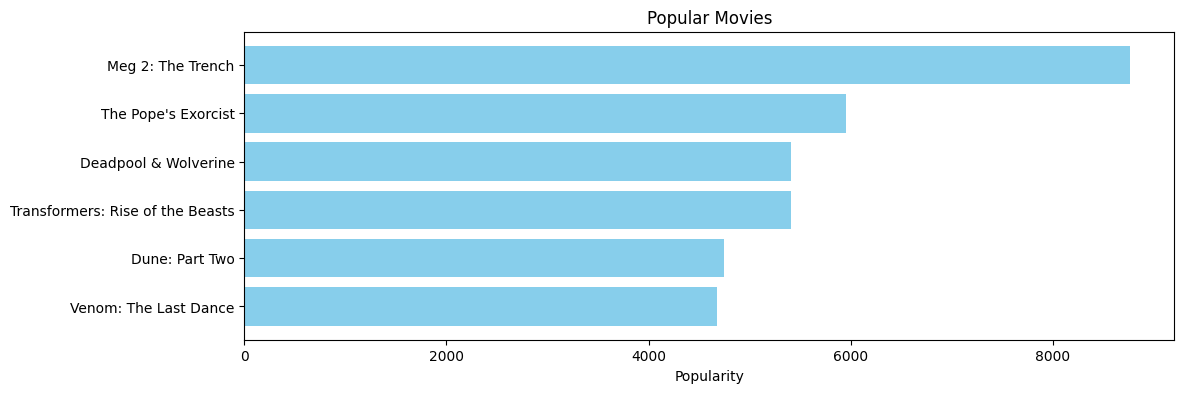

In [ ]:
# Bar graph, Popularity vs Title
pop= df.sort_values('popularity', ascending=False)
plt.figure(figsize=(12,4))

plt.barh(pop['title'].head(6),pop['popularity'].head(6), align='center',
        color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies")

# **DATA PREPROCESSING**

Removing unnecessary columns and cleaning the dataset. This step helps in reducing the dataset size and focusing on relevant features.

**Data Cleaning:** Removing any null values to ensure data integrity. This step helps in avoiding errors during model training.

**Normalization:** Scaling numerical features to a standard range (0-1). This step ensures that all features contribute equally to the model's performance.

**Drop records where 'title' is NaN**

In [ ]:
# Drop records where 'title' is NaN
df = df.dropna(subset=['title']).reset_index(drop=True)

# Verify the number of records after dropping
print(f"Number of records after dropping: {df.shape[0]}")

Number of records after dropping: 722311


**Find and print the number of duplicate records in the dataset.**

In [ ]:
duplicate_records = df[df.duplicated()]
print("Number of duplicate records:", len(duplicate_records))

Number of duplicate records: 0


**To check which columns have all null (NaN) values**

In [ ]:
df.isnull().all()

,0
id,False
title,False
genres,False
original_language,False
overview,False
popularity,False
production_companies,False
release_date,False
budget,False
revenue,False


**Calculate and print the percentage of missing (null) values for each column in the dataset.**

In [ ]:
null_percentage = (df.isnull().sum() / len(df)) * 100
null_percentage.sort_values(ascending=False)

,0
recommendations,95.013782
tagline,84.982092
keywords,70.838185
backdrop_path,69.097799
production_companies,53.290065
credits,31.109591
genres,29.116821
poster_path,25.541491
overview,16.369403
release_date,7.136123


**Drop unnecessary columns and columns that have more than 20% null values in the dataset.**

In [ ]:
df.drop(['id', 'genres', 'production_companies', 'tagline', 'credits','keywords', 'poster_path', 'backdrop_path', 'recommendations', 'status','vote_average', 'vote_count'], axis=1, inplace=True)

In [ ]:
# Display the shape of the dataset (number of rows and columns)

df.shape

(722311, 8)

In [ ]:
# Display the data types of each column in the dataset.
# The data types displayed can be:
# - int: Integer values.
# - float: Floating-point numbers.
# - object: Typically used for string or mixed data types.

df.dtypes

,0
title,object
original_language,object
overview,object
popularity,float64
release_date,object
budget,float64
revenue,float64
runtime,float64


**Filter Duplicate Movies**

1. **Title Normalization:** Convert `title` to lowercase and strip spaces to prevent duplicate issues.  
2. **Static Columns:** Keep only the first occurrence of each title for unchanged attributes.  
3. **Dynamic Columns:** Aggregate `popularity` and `revenue` using max values.  
4. **Duplicate Checks:** Ensure no duplicate titles before merging.  
5. **Merge DataFrames:** Use a left join to combine static and dynamic parts.  
6. **Final Validation:** Print dataset shape and sample to confirm correctness.

In [ ]:
duplicate_movie = df['title'].duplicated().sum()
print(f"Number of duplicate movie: {duplicate_movie}")

Number of duplicate movie: 146992


In [ ]:
duplicate_movies = df[df['title'].duplicated()]['title'].unique()
print(duplicate_movies)

['Battle: Freestyle' 'S.O.S. Mamis: La película' 'AI Love You' ...
 'The Dreamseller' 'Searching for Nepal' 'Friendsgiving']


In [ ]:
df[df['title'] == "Battle: Freestyle"]

,title,original_language,overview,popularity,release_date,budget,revenue,runtime
126,Battle: Freestyle,no,Amalie and Mikael lead their street dance team...,333.723,2022-04-01,0.0,0.0,88.0
198,Battle: Freestyle,no,Amalie and Mikael lead their street dance team...,238.540,2022-04-01,0.0,0.0,88.0
234,Battle: Freestyle,no,Amalie and Mikael lead their street dance team...,210.928,2022-04-01,0.0,0.0,88.0


In [ ]:
# Static columns (do not change over time)
static_columns = ['original_language', 'overview', 'release_date', 'budget', 'runtime']

# Keeping the first occurrence of each movie title for static columns
df_static = df.drop_duplicates(subset=['title'], keep='first')[['title'] + static_columns].reset_index(drop=True)

# Aggregating only the columns that change over time
df_dynamic = df.groupby('title', as_index=False).agg({
    'popularity': 'max',
    'revenue': 'max'
}).reset_index(drop=True)

# Check for duplicates after aggregation
print(f"Duplicate titles in df_static: {df_static['title'].duplicated().sum()}")
print(f"Duplicate titles in df_dynamic: {df_dynamic['title'].duplicated().sum()}")

# Drop duplicates explicitly before merging
df_static = df_static.drop_duplicates(subset=['title'])
df_dynamic = df_dynamic.drop_duplicates(subset=['title'])

# Merge without validate parameter for debugging
df = df_static.merge(df_dynamic, on='title', how='left')

# Display final DataFrame
df.head()


Duplicate titles in df_static: 0
Duplicate titles in df_dynamic: 0


,title,original_language,overview,release_date,budget,runtime,popularity,revenue
0,Meg 2: The Trench,en,An exploratory dive into the deepest depths of...,2023-08-02,129000000.0,116.0,8763.998,3.520565e+08
1,The Pope's Exorcist,en,Father Gabriele Amorth Chief Exorcist of the V...,2023-04-05,18000000.0,103.0,5953.227,6.567582e+07
2,Deadpool & Wolverine,en,A listless Wade Wilson toils away in civilian ...,2024-07-24,200000000.0,128.0,5410.496,1.326387e+09
3,Transformers: Rise of the Beasts,en,When a new threat capable of destroying the en...,2023-06-06,200000000.0,127.0,5409.104,4.070455e+08
4,Dune: Part Two,en,Follow the mythic journey of Paul Atreides as ...,2024-02-27,190000000.0,167.0,4742.163,6.838137e+08


In [ ]:
# Check how many duplicate movies are in the DataFrame
duplicate_movie = df['title'].duplicated().sum()
print(f"Number of duplicate movie: {duplicate_movie}")

Number of duplicate movie: 0


In [ ]:
df[df['title'] == "Battle: Freestyle"]

,title,original_language,overview,release_date,budget,runtime,popularity,revenue
126,Battle: Freestyle,no,Amalie and Mikael lead their street dance team...,2022-04-01,0.0,88.0,333.723,0.0


In [ ]:
df.shape

(575319, 8)

**Drop records having more than 50% null values.**
* Calculate the threshold for rows having more than 50% null values based on the total number of columns.
* Identify and count the rows where more than 50% of the columns have null values.
* Then, drop rows with more than 50% null values by using the 'dropna' function with the calculated threshold.
* Finally, display the shape of the dataset after removing these rows.


In [ ]:
# Calculate the threshold for 50% non-null values
row_threshold = 0.5 * len(df.columns)

# Drop rows where the number of non-null values is less than the threshold
df = df.dropna(thresh=row_threshold)

# Check the number of rows after dropping
print(f"Number of records after dropping rows with >50% null values: {df.shape[0]}")


Number of records after dropping rows with >50% null values: 575319


In [ ]:
df=df.dropna()

In [ ]:
df.isna().sum().sort_values(ascending=False)

,0
title,0
original_language,0
overview,0
release_date,0
budget,0
runtime,0
popularity,0
revenue,0


In [ ]:
null_percentage = (df.isnull().sum() / len(df)) * 100
null_percentage.sort_values(ascending=False)

,0
title,0.0
original_language,0.0
overview,0.0
release_date,0.0
budget,0.0
runtime,0.0
popularity,0.0
revenue,0.0


In [ ]:
df.shape

(430614, 8)

In [ ]:
df.columns

Index(['title', 'original_language', 'overview', 'release_date', 'budget',
       'runtime', 'popularity', 'revenue'],
      dtype='object')

**Standardize numerical features (budget, revenue, popularity, runtime) using MinMaxScaler.**
* Get and print the summary statistics (mean, std, min, max, etc.) for the numerical features: 'budget', 'revenue', 'popularity', 'runtime'.
* Apply MinMaxScaler to standardize these features by transforming them to have a mean of 0 and a standard deviation of 1.
* Update the original DataFrame with the scaled values for 'budget', 'revenue', 'popularity', and 'runtime'.
* Display the new summary statistics for these features after scaling to verify the transformation.
* Finally, show the first 5 rows of the standardized numerical features to inspect the result.


In [ ]:
# Get summary statistics
features = ['budget', 'revenue', 'popularity', 'runtime']
summary_stats = df[features].describe()
print(summary_stats)

             budget       revenue     popularity        runtime
count  4.306140e+05  4.306140e+05  430614.000000  430614.000000
mean   6.140097e+05  1.642100e+06       2.533595      61.217870
std    7.044618e+06  2.620059e+07      30.621779     121.407049
min    0.000000e+00 -1.200000e+01       0.000000       0.000000
25%    0.000000e+00  0.000000e+00       0.600000      13.000000
50%    0.000000e+00  0.000000e+00       0.656000      67.000000
75%    0.000000e+00  0.000000e+00       1.400000      93.000000
max    5.000000e+08  2.920357e+09    8763.998000   51420.000000


In [ ]:
scaler = MinMaxScaler()
numerical_features = ["popularity", "budget", "revenue", "runtime"]
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [ ]:
df[['budget', 'revenue', 'popularity','runtime']].head(5)

,budget,revenue,popularity,runtime
0,0.258,0.120553,1.000000,0.002256
1,0.036,0.022489,0.679282,0.002003
2,0.400,0.454187,0.617355,0.002489
3,0.400,0.139382,0.617196,0.002470
4,0.380,0.234154,0.541096,0.003248


In [ ]:
df[['budget', 'revenue', 'popularity','runtime']].describe()

,budget,revenue,popularity,runtime
count,430614.000000,4.306140e+05,430614.000000,430614.000000
mean,0.001228,5.622985e-04,0.000289,0.001191
std,0.014089,8.971707e-03,0.003494,0.002361
min,0.000000,0.000000e+00,0.000000,0.000000
25%,0.000000,4.109086e-09,0.000068,0.000253
50%,0.000000,4.109086e-09,0.000075,0.001303
75%,0.000000,4.109086e-09,0.000160,0.001809
max,1.000000,1.000000e+00,1.000000,1.000000


In [ ]:
df["title"] = df["title"].str.lower().str.strip()

# **MODEL BUILDING**

In [ ]:
df['combined_col'] = df['title'].astype(str) + " " + df['overview'].astype(str) + " " + df['original_language'].astype(str)

In [ ]:
model = SentenceTransformer("all-MiniLM-L6-v2")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
df.reset_index(drop=True, inplace=True)

In [ ]:
text_embeddings = model.encode(df["combined_col"], show_progress_bar=True)

Batches:   0%|          | 0/13457 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
df

In [ ]:
text_embeddings = np.array(text_embeddings)

In [ ]:
movie_embeddings = np.hstack((text_embeddings, df[numerical_features].values))

In [ ]:
def get_recommendations(movie_title):
    movie_title = movie_title.lower().strip()  # Normalize input

    # Find the movie index safely
    idx = df[df["title"].str.lower() == movie_title].index

    if len(idx) == 0:
        return "Movie not found in the dataset."

    idx = idx[0]  # Get the first index (assuming one match)

    # Create the KNN model if it's not already created
    knn = NearestNeighbors(n_neighbors=11, algorithm='brute', metric='cosine') # Adjust parameters as needed
    knn.fit(movie_embeddings)  # Fit the model with the embeddings

    # Get the top 10 nearest neighbors
    distances, indices = knn.kneighbors([movie_embeddings[idx]])

    # Return recommended movies (excluding the input movie itself) in title case
    recommended_movies = [df.iloc[i]["title"].title() for i in indices.flatten()[1:]]

    return recommended_movies

In [ ]:
print(get_recommendations("Kedarnath"))

In [ ]:
print(get_recommendations("Interceptor"))

In [ ]:
print(get_recommendations("The Flash"))

In [ ]:
print(get_recommendations("Sairat"))

In [ ]:
print(get_recommendations("Avatar"))

# **DOWNLOAD PICKLE FILE and PREPROCESS DATASET**

In [ ]:
# Save the KNN Model and Movie Embeddings to a Pickle File
with open("knn_model.pkl", "wb") as f:
    pickle.dump(knn, f)

with open("movie_embeddings.pkl", "wb") as f:
    pickle.dump(movie_embeddings, f)

In [ ]:
df.to_csv("movies.csv", index=False)

In [ ]:
df.loc[df['title'] == 'iron man']

,title,original_language,overview,release_date,budget,runtime,popularity,revenue,combined_col
